# Indian Start-Up Funding Analysis (2018 - 2021)

# Business Understanding

Main Objective of the Project

The primary objective of this project is to analyze the funding trends in the Indian start up ecosystem from 2018 to 2021.
By examining the data, we aim o identify patterns, trends and insights that can inform strategic decisions for entering the Indian start up market. Specifically, we will focus on understanding the amount of funding received by start ups, the type of investors involved and the sectors that attract the most investment.


Key Research Questions
1. How has the total amount of funding received by start-ups in India changed from 2018-2021?
2. Which sectors have received the most funding in each year?
3. Who are the top investors in the India start-up ecosystem from 2018-2021?
4. Which regions or cities in India are receiving the most start-up funding?
5. Does the stage align with the investment timeline?
6. How lon has the company been operating and how doeas this affect the amount of investment?


In [1]:
import pyodbc
import pandas as pd
from dotenv import dotenv_values
import warnings


warnings.filterwarnings('ignore')

In [2]:
# . env file

server='dap-projects-database.database.windows.net'
database='dapDB'
username='LP1_learner'
password='Hyp0th3s!$T3$t!ng'


In [3]:
#Loading environment variables from .env into a dictionary

env_var = dotenv_values('.env')

#Getting credentials

server = env_var.get('server')
database = env_var.get('database')
username = env_var.get('username')
password = env_var.get('password')

conn = f'DRIVER={{SQL SERVER}};SERVER={server};DATABASE={database};UID={username};PWD={password};timeout=30'




In [4]:
#Connecting to the server

connection = pyodbc.connect(conn)

In [5]:
#Testing connection

import pyodbc

try:
    connection = pyodbc.connect(conn)
    print("Connection successful!")
except pyodbc.Error as ex:
    sqlstate = ex.args[1]
    print(f"Connection failed: {sqlstate}")


Connection successful!


In [6]:
#Fetching from database

db_query = '''
            SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE'
            '''

data = pd.read_sql(db_query, connection)
data

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


In [7]:
query_1 = '''
          SELECT * 
          FROM LP1_startup_funding2021
          '''

df_021 = pd.read_sql(query_1, connection)
df_021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [8]:
query_2 = '''
          SELECT * 
          FROM LP1_startup_funding2020
          '''


df_020 = pd.read_sql(query_2, connection)
df_020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [9]:
# Importing 2019 csv file

df_019 = pd.read_csv(r'C:\Users\Admin\Downloads\startup_funding2019.csv')
df_019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [10]:
# Importing 2018 csv file

df_018 = pd.read_csv(r'C:\Users\Admin\Downloads\startup_funding2018.csv')
df_018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


# Data Manipulation

Rename columns for consistency

In [11]:
# Rename columns for 2021 and 2020 datasets

df_021.rename(columns={
    'Company_Brand': 'Company',
    'What_it_does': 'What it does',
    'Amount': 'Amount($)'
}, inplace=True)

df_020.rename(columns={
    'Company_Brand': 'Company',
    'What_it_does': 'What it does',
    'Amount': 'Amount($)'
}, inplace=True)

In [12]:
# Rename columns for 2019 and 2018 datasets

df_019.rename(columns={
    'Company/Brand': 'Company'
}, inplace=True)

df_018.rename(columns={
    'Company Name': 'Company',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount': 'Amount($)',
    'Location': 'HeadQuarter',
    'About Company': 'What it does'
}, inplace=True)

In [13]:

# Define a fixed conversion rate for INR to USD
INR_TO_USD = 0.012


def convert_amount(amount):
    #Ensure amount is all string as the replace function does not apply on float objects

    # Check if the amount is already a float. If it is return it as it is.
    if isinstance(amount, float):
        return amount
    
    # Proceed to with amounts in string  form in order to apply replace function

    # Ensure the amount is a string and remove commas and whitespace
    amount_str = str(amount).replace(',', '').strip()
    
    try:
        # Check if the string starts with $ or ₹
        if amount_str.startswith('$'):
            return float(amount_str.replace('$', ''))
        elif amount_str.startswith('₹'):
            # Convert INR to USD using the fixed rate
            amount_inr = float(amount_str.replace('₹', ''))
            amount_usd = amount_inr * INR_TO_USD
            return amount_usd
        else:
            # Handle scientific notation and plain numbers
            return float(amount_str)
    except ValueError:
        # Handle any conversion errors (e.g., malformed strings)
        return None



In [14]:
# Applying conversion amounts

# Apply conversion to the 'Amount($)' column for all datasets
df_018['Amount($)'] = df_018['Amount($)'].apply(convert_amount)
df_019['Amount($)'] = df_019['Amount($)'].apply(convert_amount)
df_020['Amount($)'] = df_020['Amount($)'].apply(convert_amount)
df_021['Amount($)'] = df_021['Amount($)'].apply(convert_amount)

In [15]:
# Concatenate the datasets

combined_df = pd.concat([df_021, df_020, df_019, df_018], ignore_index=True)


In [16]:
combined_df.columns

Index(['Company', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'column10'],
      dtype='object')

In [17]:
combined_df.head()

,Company,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,column10
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,NaN


In [18]:
combined_df.tail()

,Company,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,column10
2874,Udaan,NaN,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000.0,Series C,NaN
2875,Happyeasygo Group,NaN,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,NaN,Series A,NaN
2876,Mombay,NaN,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,7500.0,Seed,NaN
2877,Droni Tech,NaN,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,420000.0,Seed,NaN
2878,Netmeds,NaN,"Chennai, Tamil Nadu, India","Biotechnology, Health Care, Pharmaceutical",Welcome to India's most convenient pharmacy!,NaN,NaN,35000000.0,Series C,NaN



# **Exploratory Data Analysis**


In [19]:
# Determining the shape of the data set

combined_df.shape

(2879, 10)

In [20]:
# Determining null values

combined_df.isna().any()


Company         False
Founded          True
HeadQuarter      True
Sector           True
What it does    False
Founders         True
Investor         True
Amount($)        True
Stage            True
column10         True
dtype: bool

In [21]:
# Determining null values

combined_df.isna().sum()


Company            0
Founded          769
HeadQuarter      114
Sector            18
What it does       0
Founders         545
Investor         626
Amount($)        567
Stage            938
column10        2877
dtype: int64

In [22]:
#Assessing columns in all the data sets

combined_df.columns

Index(['Company', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'column10'],
      dtype='object')

In [23]:
#Gaining an overvew of the data

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       2879 non-null   object 
 1   Founded       2110 non-null   float64
 2   HeadQuarter   2765 non-null   object 
 3   Sector        2861 non-null   object 
 4   What it does  2879 non-null   object 
 5   Founders      2334 non-null   object 
 6   Investor      2253 non-null   object 
 7   Amount($)     2312 non-null   float64
 8   Stage         1941 non-null   object 
 9   column10      2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 225.0+ KB


In [24]:
# Determining the datatypes

combined_df.dtypes

Company          object
Founded         float64
HeadQuarter      object
Sector           object
What it does     object
Founders         object
Investor         object
Amount($)       float64
Stage            object
column10         object
dtype: object

In [37]:
# Getting an overview with descriptive statistics

combined_df.describe(include = ['object']).T



,count,unique,top,freq
Company,2879,2214,BharatPe,10
HeadQuarter,2765,172,Bangalore,764
Sector,2861,873,FinTech,173
What it does,2879,2691,Provides online learning classes,5
Founders,2334,1980,"Ashneer Grover, Shashvat Nakrani",7
Investor,2253,1777,Inflection Point Ventures,36
Stage,1941,75,Seed,606
column10,2,2,Pre-Seed,1


In [26]:
# Determining unique values

combined_df.nunique()

Company         2214
Founded           34
HeadQuarter      172
Sector           873
What it does    2691
Founders        1980
Investor        1777
Amount($)        485
Stage             75
column10           2
dtype: int64

In [33]:
# Analyze data by groups, such as sector to find patterns and insights.

combined_df.groupby('Sector').sum('Amount($)')


,Founded,Amount($)
Sector,,
"3D Printing, Manufacturing, Product Design",0.0,0.0
AI,18155.0,116346500.0
AI & Data science,0.0,8000000.0
AI & Debt,2018.0,0.0
AI & Deep learning,2017.0,0.0
...,...,...
Yoga & wellness,0.0,2800000.0
eMobility,0.0,1000000.0
"eSports, Gaming, Video Games",0.0,480000.0


<function matplotlib.pyplot.show(close=None, block=None)>

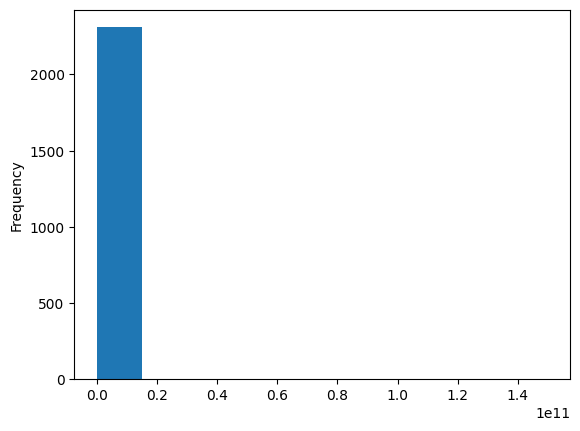

In [34]:
# Visualize the distribution of the amount column

import matplotlib.pyplot as plt
import seaborn as sns

combined_df['Amount($)'].plot( kind = 'hist') 
plt.xlabel = ('Amount($)')
plt.ylabel = ('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

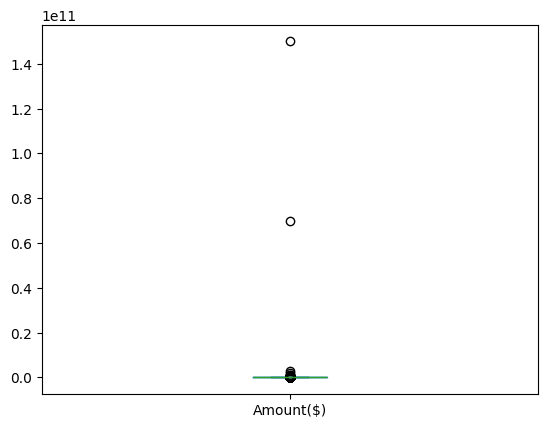

In [36]:

# Identify outliers and the spread of the Amount column

import matplotlib.pyplot as plt
import seaborn as sns

combined_df['Amount($)'].plot( kind = 'box') 
plt.xlabel = ('Amount($)')
plt.show